In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage.measure as measure
import skimage.io as io
import pandas as pd
import math

In [2]:
os.getcwd() # check workinh directory
# Constants
GFP_path = 'data/GFP.tif'
mCherry_path = 'data/mCherry.tif'
MASK_path = 'data/sampleMask.tif'

In [16]:
# All input dimension should be (FRAME_NUMBER, 1200, 1200)
mask = io.imread(MASK_path)
gfp = io.imread(GFP_path)
mcy = io.imread(mCherry_path)
print(np.shape(mask), np.shape(gfp), np.shape(mcy))
frame_num = np.shape(mask)[0]

(20, 1200, 1200) (20, 1200, 1200) (20, 1200, 1200)


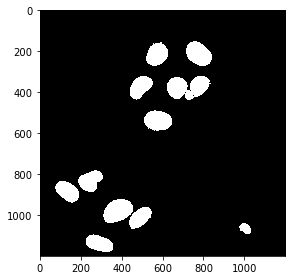

In [17]:
io.imshow(mask[1,:,:])

In [18]:
gfp_frame = measure.regionprops(
    measure.label(mask[1,:,:]),
    intensity_image = gfp[1,:,:])
mcy_frame = measure.regionprops(
    measure.label(mask[1,:,:]),
    intensity_image = mcy[1,:,:])
# Reference: https://blog.csdn.net/u013066730/article/details/87971770

In [27]:
x = []
y = []
frame = []
gfp_intensity = []
mcy_intensity = []
for j in range(frame_num):
    gfp_frame = measure.regionprops(
        measure.label(mask[j,:,:]),
        intensity_image = gfp[j,:,:])
    mcy_frame = measure.regionprops(
        measure.label(mask[j,:,:]),
        intensity_image = mcy[j,:,:])
    for i in range(len(gfp_frame)):
        gfp_intensity.append(gfp_frame[i].mean_intensity)
        mcy_intensity.append(mcy_frame[i].mean_intensity)
        frame.append(j)
        x.append(math.ceil(gfp_frame[i].centroid[0]))
        y.append(math.ceil(gfp_frame[i].centroid[1]))
dt = pd.DataFrame({"x":x,"y":y,"frame":frame,"gfp_intensity":gfp_intensity,"mcy_intensity":mcy_intensity})

Text(0, 0.5, 'GFP')

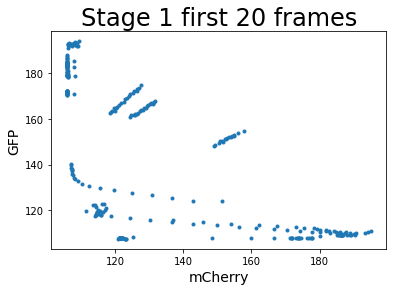

In [28]:
plt.scatter(dt['mcy_intensity'], dt['gfp_intensity'], marker=".")
plt.title('Stage 1 first 20 frames', fontsize=24)
plt.xlabel('mCherry', fontsize=14)
plt.ylabel('GFP', fontsize=14)

In [44]:
cls = pd.read_csv("/Users/jefft/Desktop/BMI_Project/test2-data_table.csv")

In [45]:
cls = cls[['User Label','Center of the object_1', 'Center of the object_0', 'Size in pixels','timestep']]
cls['Center of the object_1'] = list(map(math.ceil, cls['Center of the object_1']))
cls['Center of the object_0'] = list(map(math.ceil, cls['Center of the object_0']))
cls.rename(columns={'Center of the object_1':'x', 'Center of the object_0':'y', 'timestep':'frame'}, inplace=True)

In [46]:
cls_dt_merged = pd.merge(cls, dt, "inner")

Text(0, 0.5, 'GFP')

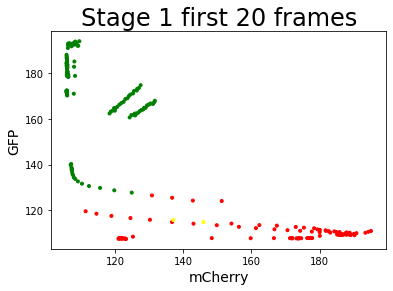

In [66]:
cls_dt_merged = cls_dt_merged[cls_dt_merged['User Label']!="F"]
color = []
for i in range(cls_dt_merged.shape[0]):
    l = cls_dt_merged.iloc[i,0]
    if l=="S":
        color.append('green')
    elif l=="G1":
        color.append('red')
    else:
        color.append('yellow')
plt.scatter(cls_dt_merged['mcy_intensity'], cls_dt_merged['gfp_intensity'], marker=".", label="User Label", c=color)
plt.title('Stage 1 first 20 frames', fontsize=24)
plt.xlabel('mCherry', fontsize=14)
plt.ylabel('GFP', fontsize=14)

['green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'red',
 'green',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green'